## Machine Learning - Ex.4


Submitted by: Raz Gvili

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. Non-linear Logistic regression (2-D)
Lets generate some 2-D training data:

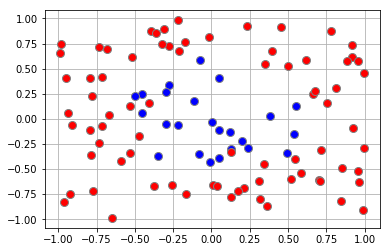

In [105]:
def generate_data_2D (N=100):
    x = np.random.random((N,2))*2-1
    X = np.concatenate((np.ones((N,1)),x,x**2,(x[:,0]*x[:,1])[:,None]),axis=1);
    w = np.array([-0.3,0,0,1,1,0])*10
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y,w


x,y,ww = generate_data_2D(N=100)
plt.plot(x[y==0,0],x[y==0,1],'ob',markeredgecolor='gray',markersize=8)
plt.plot(x[y==1,0],x[y==1,1],'or',markeredgecolor='gray',markersize=8)
plt.grid()
plt.show()

Use the same algoirthm from Ex.3, to fit the following 2-D **non-linear** logistic model:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2)$$

where $g(\cdot)$ is the sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

hint: map the 2-D input samples to a higher dimension..


Plot the results as you did in Ex.3:
- Use `meshgrid` and `contour` to plot the 2-D function $g(\vec{w}\cdot\vec{x})$. Use the blue-white-red colormap: cmap=plt.cm.bwr
- Plot the data points (in blue and red) on top of the previous plot
- Add a black contour line that represents the **non-linear** decision boundary: $g(\vec{w}\cdot\vec{x})=0.5$ 





In [139]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logistical_reg_step_gradient(X, y, w_vec, learning_rate, sampels_amount):
        
    w_grad = np.zeros(w_vec.size)
    y_hat = np.zeros(y.size)
    
    # update each param
    for w_param in range(0, w_vec.size):
        
        # sum of all sampels for each w_param 
        for sample in range(0, sampels_amount):
            
            # Sigmoid calc 
            z = np.dot(w_vec, X[sample])
            y_hat[sample] = sigmoid(z)
            
            w_grad[w_param] += ((y_hat[sample] - y[sample]) * X[sample][w_param])
            
        w_grad[w_param] *= (1/float(sampels_amount))
    
    next_w = w_vec - (learning_rate * w_grad)
    
    
    # J for logistic regression calc
    J_iteration = 0
    for sample in range(0, sampels_amount):
        J_iteration += ( (y[sample] * np.log(y_hat[sample])) + ((1 - y[sample]) * (np.log(1 - y_hat[sample]))) ) 
        
    J_iteration *= (1/float(sampels_amount)) * (-1)
    
    
    return J_iteration, next_w


In [137]:
def reg_gradient_descent (X, y, alpha=0.01, T=100):
    
    sampels_amount = X[:,0].size
     
    # X = np.concatenate((np.ones((sampels_amount,1)),X),axis=1)
    
    # to hold the cost function value J at each iteration
    J = np.zeros(T)
    
    # initial guess 
    w = np.zeros(X.shape[1])
    
    for i in range(T):
        J[i], w = logistical_reg_step_gradient(X, y, w, alpha, sampels_amount)
        
    
    return w, J

In [ ]:
# mapping the 2-D input samples to a higher dimension

X = np.copy(x)

xx1 = (x[:,0])**2
xx2 = (x[:,1])**2
x1x2 = ((x[:,0]) * (x[:,1]))
X = np.column_stack((X, xx1))
X = np.column_stack((X, xx2))
X = np.column_stack((X, x1x2))
X = np.concatenate((np.ones((100,1)),X),axis=1)

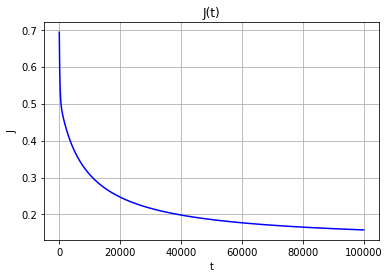

w: [-3.07577103 -0.71463532 -0.91994357  9.87330044 10.58905807  1.04601734]


In [109]:
T = 100000

w, J = reg_gradient_descent(X, y, 0.01, T)
t = np.linspace(0, T, T)

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

# w values 
print("w:", w)

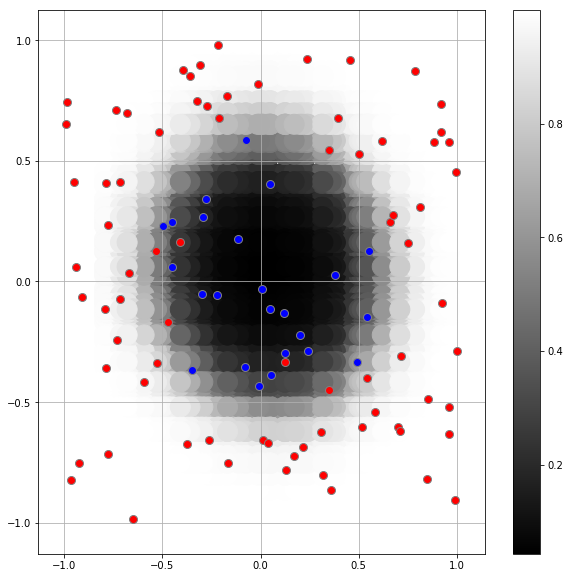

In [130]:
x_x1, x_x2 = np.meshgrid(x[:,0],x[:,1])
z = w[0] + w[1]*x_x1 + w[2]*x_x2 + w[3]*x_x1**2 + w[4]*x_x2**2 + w[5]*x_x1*x_x2
yy = sigmoid(z)

plt.figure(figsize=(10,10))

plt.plot(x[y==0,0],x[y==0,1],'ob',markeredgecolor='gray',markersize=8)
plt.plot(x[y==1,0],x[y==1,1],'or',markeredgecolor='gray',markersize=8)

plt.scatter(x_x1, x_x2, s=400, c=yy, cmap=plt.cm.gray)

plt.colorbar()

plt.grid()
plt.show()

### 2. Polynomial regression - overfitting

First, lets generate some polynomial training data and divide it (50%/50% split) into training set (red) and testing set:

# Using linear regression from here 
## (-- Subplots after the computation per Dim --)

In [ ]:
def mse (x_train, y_train, x_test, y_test, model_function):
    

In [50]:
def step_gradient(X, y, w_vec, learning_rate, sampels_amount):
    
    J = 0
    w_grad = np.zeros(w_vec.size)

    # update each param
    for w_param in range(0, w_vec.size):
        
        # sum of all sampels for each w_param 
        for sample in range(0, sampels_amount):
            w_grad[w_param] += (((np.dot(w_vec, X[sample])) - y[sample]) * X[sample][w_param])
            
        w_grad[w_param] *= (1/float(sampels_amount))
    
    next_w = w_vec - (learning_rate * w_grad)
    
    for sample in range(0, sampels_amount):
        J += ((((np.dot(w_vec, X[sample])) - y[sample])**2) * (1/float(sampels_amount)))
    
    return J, next_w

def gradient_descent (X, y, alpha, T):
    
    sampels_amount = X[:,0].size
    
    # to hold the cost function value J at each iteration
    J = np.zeros(T)
    
    # initial guess 
    w = np.zeros(X.shape[1])
    
    for i in range(T):
        J[i], w = step_gradient(X, y, w, alpha, sampels_amount)
    
    return w, J

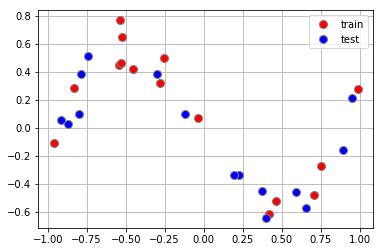

In [51]:
def generate_data (N=30):
    x = np.random.rand(N)*2-1 
    y = (x-0.9)*2*x*(x+0.9) # 3rd degree polynom
    y += np.random.randn(N)*0.1 # add gaussian noise (with sigma = 4)
    return x,y


x,y = generate_data()

x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.grid()
plt.show()




- Fit polynomial models of different degrees (from d=1, d=2, and up to d=9) to the data (use **only** the training data when fitting the models).

- For each polymonial model,  plot the resulting curve (together with train/test points) and calculate training/test errors. use subplots. 

- Finally, plot the training errors and the test errors as a function of the polynomial degree. Use log-scale if necessary: `plt.yscale('log')`


In [142]:
# Err array init (Converged J value is the total training error)
J_arr = np.zeros(9)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))

X = np.concatenate((ones,X),axis=1)


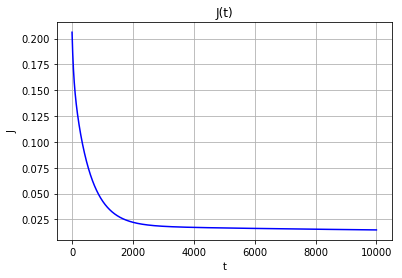

In [147]:
T = 10000
w, J = gradient_descent(X, y_trn, 0.01, T)
t = np.linspace(0, T, T)

J_arr[0] = J[T-1]

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

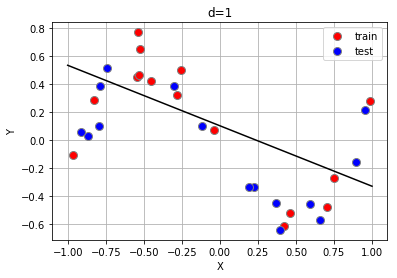

In [54]:
xx = np.linspace(-1,1,1000) 
yy_1 = w[0] + w[1]*xx 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_1, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=1')
plt.grid()

plt.show()

In [55]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

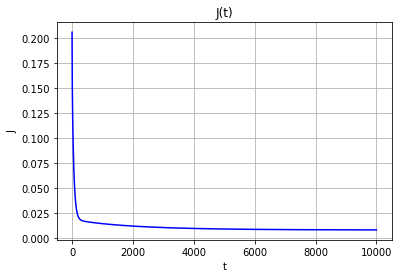

In [148]:
T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[1] = J[T-1]

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



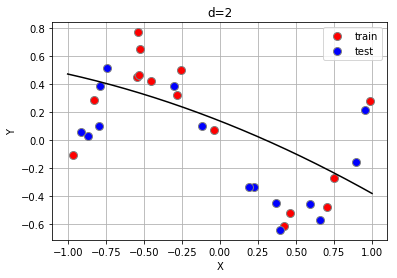

In [57]:
yy_2 = w[0] + w[1]*xx + w[2]*xx**2
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_2, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=2')
plt.grid()

plt.show()

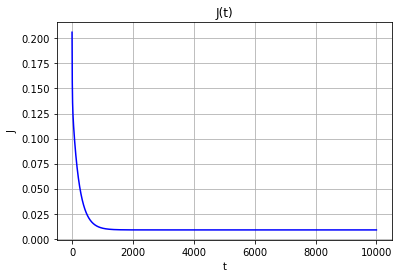

In [149]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[2] = J[T-1]

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



w val: [-0.0117253  -1.58519876  0.06327859  1.87920034]


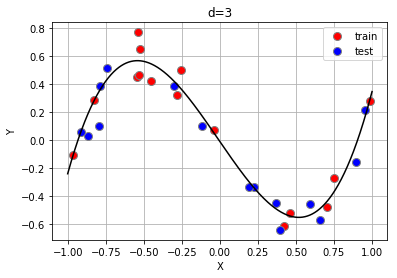

In [59]:
yy_3 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3
xx = np.linspace(-1,1,1000) 

print("w val:", w)

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_3, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=3')
plt.grid()

plt.show()

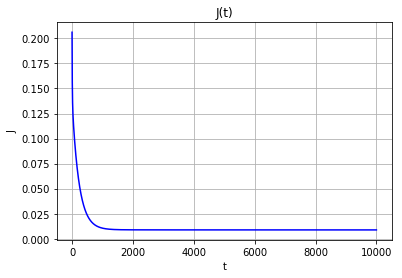

In [150]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[3] = J[T-1]

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



w val: [-0.007119   -1.44138267  0.09956806  1.28443666 -0.05999938  0.48089492]


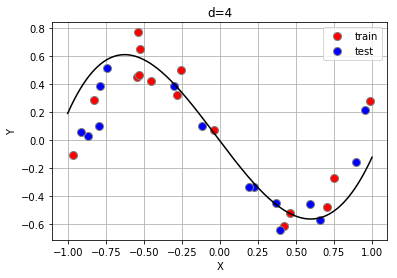

In [65]:
yy_4 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4
xx = np.linspace(-1,1,1000) 
print("w val:", w)

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_4, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=4')
plt.grid()

plt.show()

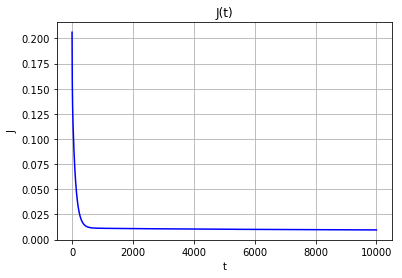

In [151]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[4] = J[T-1]

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



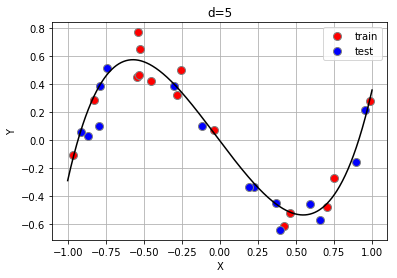

In [68]:
yy_5 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4 + w[5]*xx**5 
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_5, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=5')
plt.grid()

plt.show()

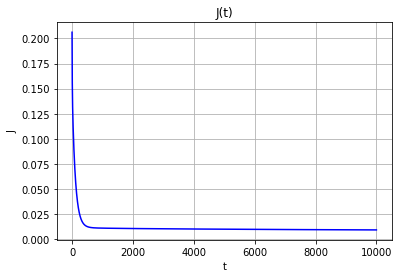

In [152]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

x_6 = (X[:,1])**6
X = np.column_stack((X, x_6))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[5] = J[T-1]

#Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



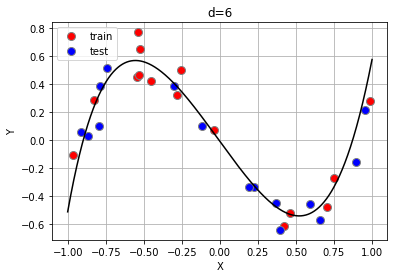

In [79]:
yy_6 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4 + w[5]*xx**5 + w[6]*xx**6
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_6, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=6')
plt.grid()

plt.show()

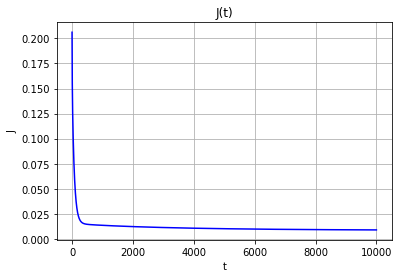

In [154]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

x_6 = (X[:,1])**6
X = np.column_stack((X, x_6))

x_7 = (X[:,1])**7
X = np.column_stack((X, x_7))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[6] = J[T-1]


#Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



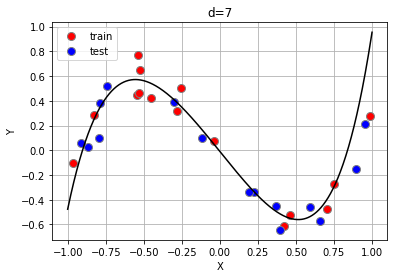

In [131]:
yy_7 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4 + w[5]*xx**5 + w[6]*xx**6 + w[7]*xx**7
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_7, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=7')
plt.grid()

plt.show()

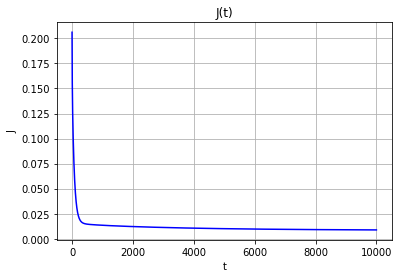

In [155]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

x_6 = (X[:,1])**6
X = np.column_stack((X, x_6))

x_7 = (X[:,1])**7
X = np.column_stack((X, x_7))

x_8 = (X[:,1])**8
X = np.column_stack((X, x_8))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[7] = J[T-1]

#Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



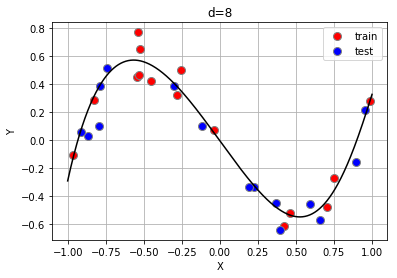

In [84]:
yy_8 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4 + w[5]*xx**5 + w[6]*xx**6 + w[7]*xx**7 + w[8]*xx**8
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_8, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=8')
plt.grid()

plt.show()

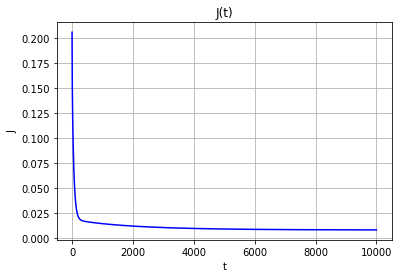

In [209]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

x_6 = (X[:,1])**6
X = np.column_stack((X, x_6))

x_7 = (X[:,1])**7
X = np.column_stack((X, x_7))

x_8 = (X[:,1])**8
X = np.column_stack((X, x_8))

x_9 = (X[:,1])**9
X = np.column_stack((X, x_9))

T = 10000
w, J = gradient_descent(X, y_trn, 0.1, T)
t = np.linspace(0, T, T)

J_arr[8] = J[T-1]

#Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



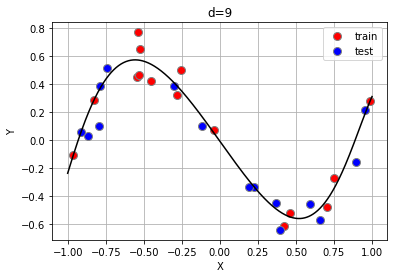

In [210]:
yy_9 = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3 + w[4]*xx**4 + w[5]*xx**5 + w[6]*xx**6 + w[7]*xx**7 + w[8]*xx**8 + w[9]*xx**9
xx = np.linspace(-1,1,1000) 

plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_9, '-k',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=9')
plt.grid()

plt.show()

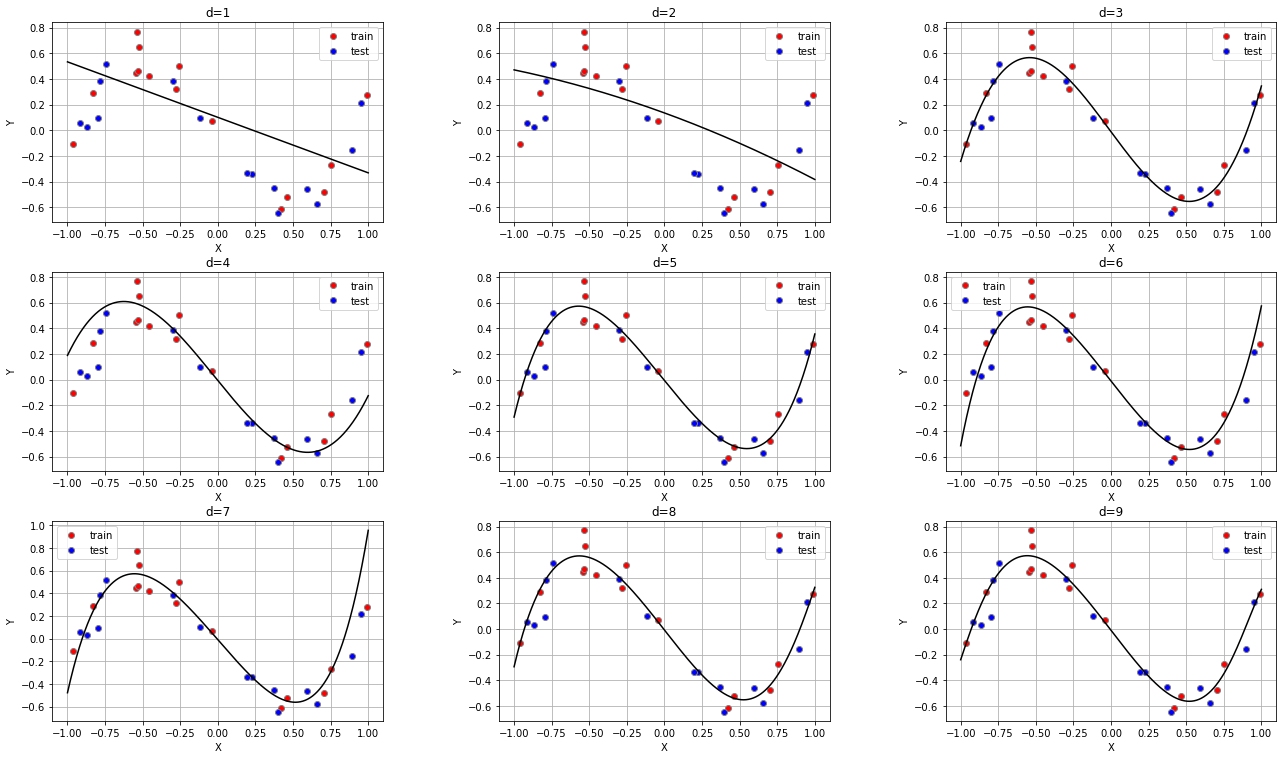

In [139]:
# plot with various axes scales
plt.figure(figsize=[20, 10])

plt.subplot(3,3,1)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_1, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=1')
plt.grid(True)

plt.subplot(3,3,2)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_2, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=2')
plt.grid(True)

plt.subplot(3,3,3)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_3, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=3')
plt.grid(True)

plt.subplot(3,3,4)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_4, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=4')
plt.grid(True)

plt.subplot(3,3,5)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_5, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=5')
plt.grid(True)

plt.subplot(3,3,6)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_6, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=6')
plt.grid(True)

plt.subplot(3,3,7)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_7, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=7')
plt.grid(True)

plt.subplot(3,3,8)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_8, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=8')
plt.grid(True)

plt.subplot(3,3,9)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_9, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=9')
plt.grid(True)

plt.subplots_adjust(top=0.97, bottom=0.0001, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


plt.show()


# Testing error calculation  

In [376]:
Test_err_arr = np.zeros(9)

def Test_err_arr_calc(func):
    err = 0
    for i in range(0,len(x_tst)):
        xxxx = x_tst[i]
        err += (y_tst[i] - func)**2
    
    err *= (1 / float(len(x_tst)))
    
    return err

xxxx = 1

yy_1_t = w[0] + w[1]*xxxx
yy_2_t = w[0] + w[1]*xxxx + w[2]*xxxx**2
yy_3_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3
yy_4_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4
yy_5_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4 + w[5]*xxxx**5
yy_6_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4 + w[5]*xxxx**5 + w[6]*xxxx**6
yy_7_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4 + w[5]*xxxx**5 + w[6]*xxxx**6 + w[7]*xxxx**7
yy_8_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4 + w[5]*xxxx**5 + w[6]*xxxx**6 + w[7]*xxxx**7 + w[8]*xxxx**8
yy_9_t = w[0] + w[1]*xxxx + w[2]*xxxx**2 + w[3]*xxxx**3 + w[4]*xxxx**4 + w[5]*xxxx**5 + w[6]*xxxx**6 + w[7]*xxxx**7 + w[8]*xxxx**8 + w[9]*xxxx**9

Test_err_arr[0] = Test_err_arr_calc(yy_1_t)
Test_err_arr[1] = Test_err_arr_calc(yy_2_t)
Test_err_arr[2] = Test_err_arr_calc(yy_3_t)
Test_err_arr[3] = Test_err_arr_calc(yy_4_t)
Test_err_arr[4] = Test_err_arr_calc(yy_5_t)
Test_err_arr[5] = Test_err_arr_calc(yy_6_t)
Test_err_arr[6] = Test_err_arr_calc(yy_7_t)
Test_err_arr[7] = Test_err_arr_calc(yy_8_t)
Test_err_arr[8] = Test_err_arr_calc(yy_9_t)

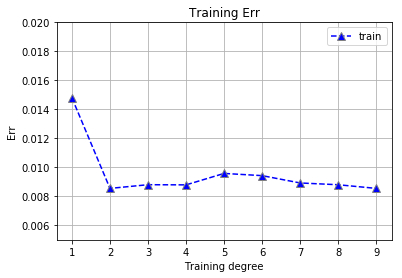

In [396]:
dim = [1,2,3,4,5,6,7,8,9] 

plt.plot(dim,J_arr,'b^--',markeredgecolor='gray',markersize=8)
plt.legend(['train'])
plt.xlabel('Training degree')
plt.ylabel('Err')
plt.title('Training Err')
plt.grid()
plt.ylim(0.005,0.02)

plt.show()

### 3. Polynomial regression - regularization

In this section we will use the same data from the previous section to learn a 9-th degree polynomial model. To avoid overfitting we will use regularization:

$$ J(\vec{w}) = \frac{1}{n} \sum_{i=1}^n{(\hat{y_i}-y_i)^2} + \lambda \vec{w}\cdot\vec{w}$$

Try different values of $\lambda$ (use: `np.logspace`): 
$$\lambda=10^{-7},10^{-6},...,10^{+1}$$

- For each model,  plot the resulting curve (together with train/test points) and calculate training/test errors. use subplots. 

- Finally, plot the training errors and the test errors as a function of $\lambda$. Use log-scales on both axis if necessary.

### Gradient descent + regularization: 

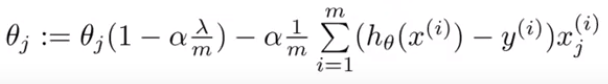

In [327]:
def step_gradient_regularization(X, y, w_vec, learning_rate, sampels_amount, lambda_):
    
    J = 0
    w_grad = np.zeros(w_vec.size)

    # update each param
    for w_param in range(0, w_vec.size):
        
        # sum of all sampels for each w_param 
        for sample in range(0, sampels_amount):
            w_grad[w_param] += (((np.dot(w_vec, X[sample])) - y[sample]) * X[sample][w_param])
            
        w_grad[w_param] *= (1/float(sampels_amount))
    
    next_w = w_vec * (1 - ((lambda_ * learning_rate) * (1/float(sampels_amount)))) - (learning_rate * w_grad)
    
    # Cost per sample (theta) -> Sum of sampels

    for sample in range(0, sampels_amount):
        
        J += (((np.dot(w_vec, X[sample])) - y[sample])**2)
        
        # Regularization penalty 
        J += lambda_ * (np.dot(w_vec, w_vec))
    
    J *= (1 / float(sampels_amount))
    
    return J, next_w

def gradient_descent_regularization (X, y, alpha, T, lambda_):
    
    sampels_amount = X[:,0].size - 1
    
    # to hold the cost function value J at each iteration
    J = np.zeros(T)
    
    # initial guess 
    w = np.zeros(X.shape[1])
    
    for i in range(T):
        J[i], w = step_gradient_regularization(X, y, w, alpha, sampels_amount, lambda_)
    
    return w, J

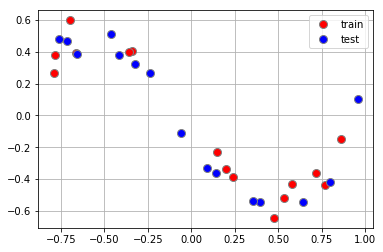

In [289]:
def generate_data (N=30):
    x = np.random.rand(N)*2-1 
    y = (x-0.9)*2*x*(x+0.9) # 3rd degree polynom
    y += np.random.randn(N)*0.1 # add gaussian noise (with sigma = 4)
    return x,y


x,y = generate_data()

x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',markeredgecolor='gray',markersize=8)
plt.legend(['train','test'])
plt.grid()
plt.show()





In [328]:
X = np.copy(x_trn)
X = np.reshape(X, (15,1))
ones = np.ones(15)
ones = np.reshape(ones, (15,1))
X = np.concatenate((ones,X),axis=1)

x_2 = (X[:,1])**2
X = np.column_stack((X, x_2))

x_3 = (X[:,1])**3
X = np.column_stack((X, x_3))

x_4 = (X[:,1])**4
X = np.column_stack((X, x_4))

x_5 = (X[:,1])**5
X = np.column_stack((X, x_5))

x_6 = (X[:,1])**6
X = np.column_stack((X, x_6))

x_7 = (X[:,1])**7
X = np.column_stack((X, x_7))

x_8 = (X[:,1])**8
X = np.column_stack((X, x_8))

x_9 = (X[:,1])**9
X = np.column_stack((X, x_9))


In [393]:
# lambdaVal range (0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10): 

# Theta list 
Iterations = []

T = 100000

for i in range(2,11):
    w, J = gradient_descent_regularization(X[:,0:i], y_trn, 0.1, T, 0.001)
    Iterations.append((w, J))
    

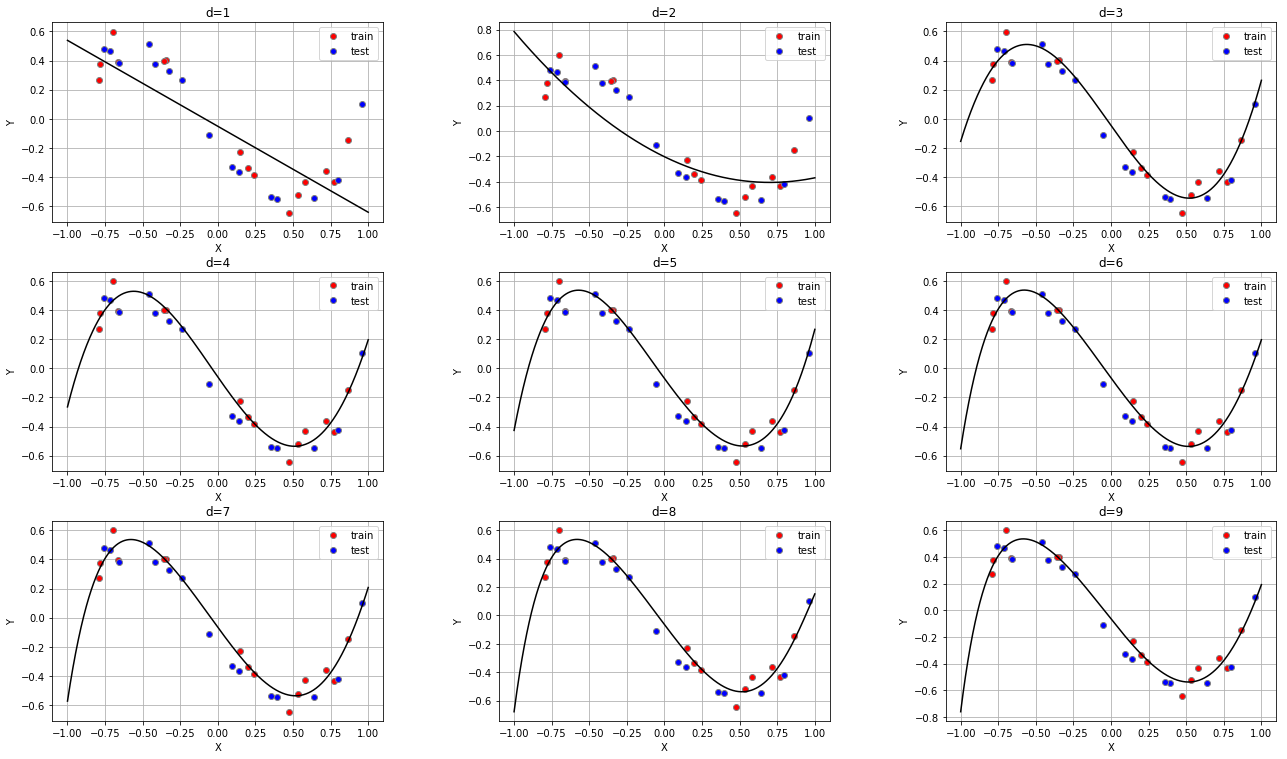

In [394]:
xxx = np.linspace(-1,1,1000)

yy_1_reg = Iterations[0][0][0] + Iterations[0][0][1]*xxx

yy_2_reg = Iterations[1][0][0] + Iterations[1][0][1]*xxx + Iterations[1][0][2]*xxx**2

yy_3_reg = Iterations[2][0][0] + Iterations[2][0][1]*xxx + Iterations[2][0][2]*xxx**2 + Iterations[2][0][3]*xxx**3

yy_4_reg = Iterations[3][0][0] + Iterations[3][0][1]*xxx + Iterations[3][0][2]*xxx**2 + Iterations[3][0][3]*xxx**3 + Iterations[3][0][4]*xxx**4

yy_5_reg = Iterations[4][0][0] + Iterations[4][0][1]*xxx + Iterations[4][0][2]*xxx**2 + Iterations[4][0][3]*xxx**3 + Iterations[4][0][4]*xxx**4 + Iterations[4][0][5]*xxx**5

yy_6_reg = Iterations[5][0][0] + Iterations[5][0][1]*xxx + Iterations[5][0][2]*xxx**2 + Iterations[5][0][3]*xxx**3 + Iterations[5][0][4]*xxx**4 + Iterations[5][0][5]*xxx**5 + Iterations[5][0][6]*xxx**6

yy_7_reg = Iterations[6][0][0] + Iterations[6][0][1]*xxx + Iterations[6][0][2]*xxx**2 + Iterations[6][0][3]*xxx**3 + Iterations[6][0][4]*xxx**4 + Iterations[6][0][5]*xxx**5 + Iterations[6][0][6]*xxx**6 + Iterations[6][0][7]*xxx**7

yy_8_reg = Iterations[7][0][0] + Iterations[7][0][1]*xxx + Iterations[7][0][2]*xxx**2 + Iterations[7][0][3]*xxx**3 + Iterations[7][0][4]*xxx**4 + Iterations[7][0][5]*xxx**5 + Iterations[7][0][6]*xxx**6 + Iterations[7][0][7]*xxx**7 + Iterations[7][0][8]*xxx**8

yy_9_reg = Iterations[8][0][0] + Iterations[8][0][1]*xxx + Iterations[8][0][2]*xxx**2 + Iterations[8][0][3]*xxx**3 + Iterations[8][0][4]*xxx**4 + Iterations[8][0][5]*xxx**5 + Iterations[8][0][6]*xxx**6 + Iterations[8][0][7]*xxx**7 + Iterations[8][0][8]*xxx**8 + Iterations[8][0][9]*xxx**9


# plot with various axes scales
plt.figure(figsize=[20, 10])

plt.subplot(3,3,1)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_1_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=1')
plt.grid(True)

plt.subplot(3,3,2)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_2_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=2')
plt.grid(True)

plt.subplot(3,3,3)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_3_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=3')
plt.grid(True)

plt.subplot(3,3,4)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_4_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=4')
plt.grid(True)

plt.subplot(3,3,5)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_5_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=5')
plt.grid(True)

plt.subplot(3,3,6)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_6_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=6')
plt.grid(True)

plt.subplot(3,3,7)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_7_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=7')
plt.grid(True)

plt.subplot(3,3,8)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_8_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=8')
plt.grid(True)

plt.subplot(3,3,9)
plt.plot(x_trn,y_trn ,'or',x_tst,y_tst,'ob', xx, yy_9_reg, '-k',markeredgecolor='gray',markersize=6)
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('d=9')
plt.grid(True)

plt.subplots_adjust(top=0.97, bottom=0.0001, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


plt.show()


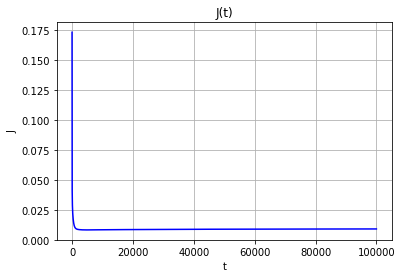

In [395]:
t = np.linspace(0, T, T)
J_random_converg_test = Iterations[5][1]

#Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()



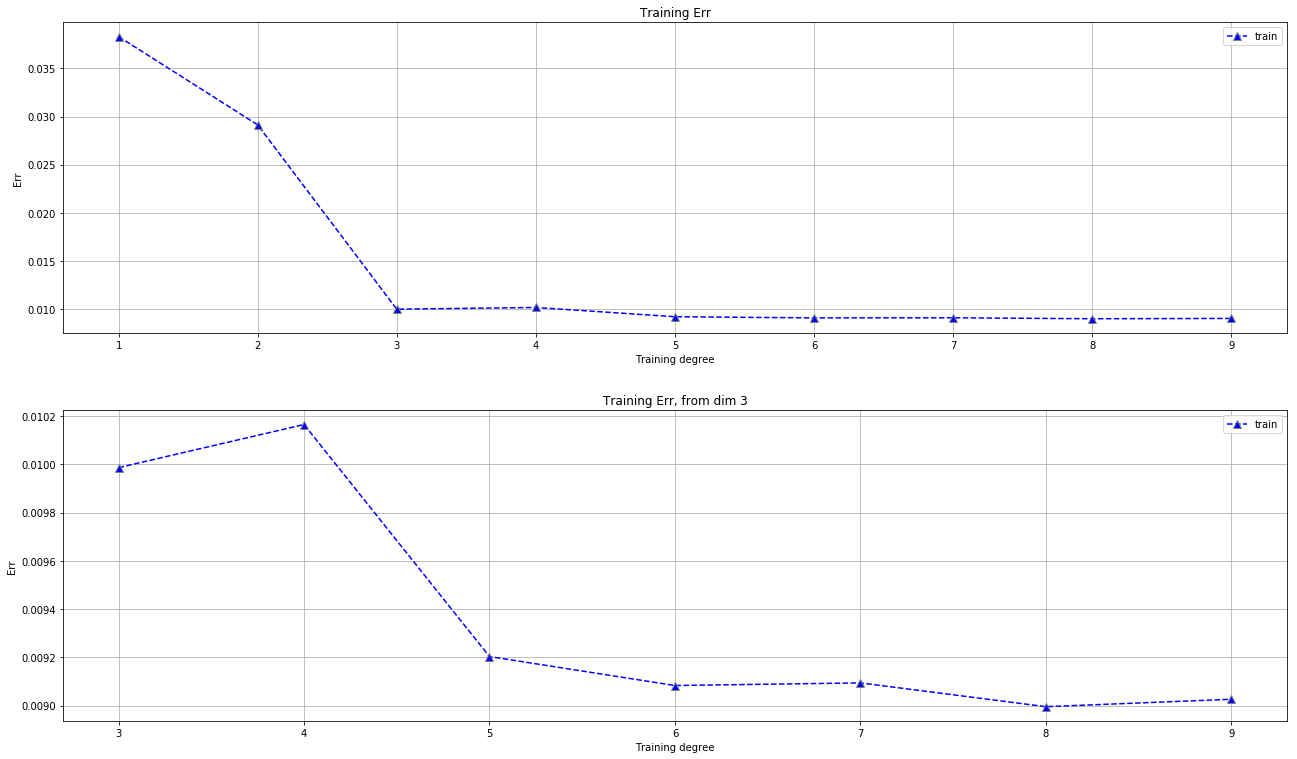

In [405]:
dim = [1,2,3,4,5,6,7,8,9] 
dim2 = [3,4,5,6,7,8,9] 

J_arr_reg = [
    Iterations[0][1][T-1],
    Iterations[1][1][T-1],
    Iterations[2][1][T-1],
    Iterations[3][1][T-1],
    Iterations[4][1][T-1],
    Iterations[5][1][T-1],
    Iterations[6][1][T-1],
    Iterations[7][1][T-1],
    Iterations[8][1][T-1]
]

J_arr_reg2 = [
    Iterations[2][1][T-1],
    Iterations[3][1][T-1],
    Iterations[4][1][T-1],
    Iterations[5][1][T-1],
    Iterations[6][1][T-1],
    Iterations[7][1][T-1],
    Iterations[8][1][T-1]
]


# plot with various axes scales
plt.figure(figsize=[20, 10])

plt.subplot(2,1,1)
plt.plot(dim,J_arr_reg,'b^--',markeredgecolor='gray',markersize=8)
plt.legend(['train'])
plt.xlabel('Training degree')
plt.ylabel('Err')
plt.title('Training Err')
plt.grid()

plt.subplot(2,1,2)
plt.plot(dim2,J_arr_reg2,'b^--',markeredgecolor='gray',markersize=8)
plt.legend(['train'])
plt.xlabel('Training degree')
plt.ylabel('Err')
plt.title('Training Err, from dim 3')
plt.grid()

plt.subplots_adjust(top=0.97, bottom=0.0001, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


plt.show()

## Good luck !